In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#Download the data
df=pd.read_csv('mail_data.csv')

In [60]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [61]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
#dimensions of the DataFrame df
df.shape

(5572, 2)

In [63]:
# the number of missing values 
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [64]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [65]:
#get the summary statistics
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [66]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

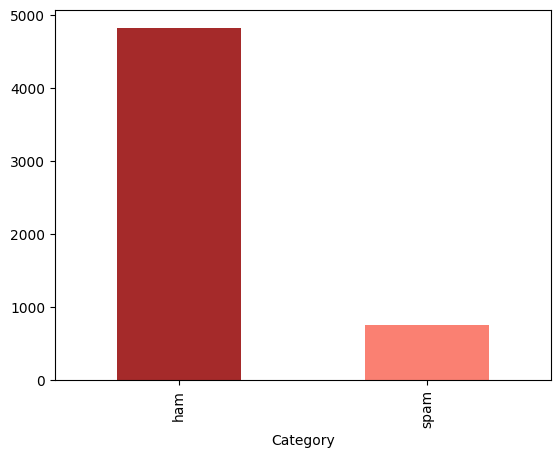

In [67]:
df.Category.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

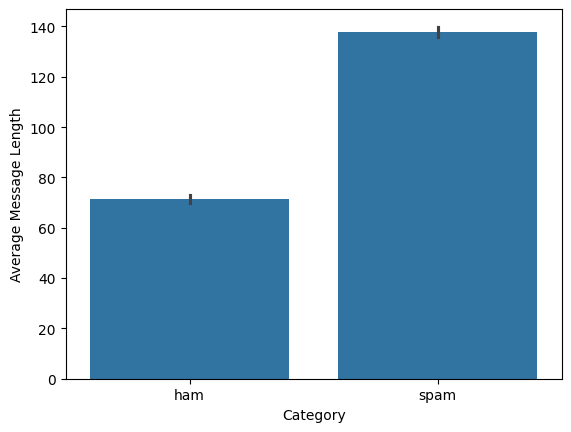

     Category                                            Message  \
0         ham  Go until jurong point, crazy.. Available only ...   
1         ham                      Ok lar... Joking wif u oni...   
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3         ham  U dun say so early hor... U c already then say...   
4         ham  Nah I don't think he goes to usf, he lives aro...   
...       ...                                                ...   
5567     spam  This is the 2nd time we have tried 2 contact u...   
5568      ham               Will ü b going to esplanade fr home?   
5569      ham  Pity, * was in mood for that. So...any other s...   
5570      ham  The guy did some bitching but I acted like i'd...   
5571      ham                         Rofl. Its true to its name   

      Message_Length  
0                111  
1                 29  
2                155  
3                 49  
4                 61  
...              ...  
5567             160  

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the DataFrame
dt = df.copy()

# Calculate message lengths
dt['Message_Length'] = dt['Message'].apply(len)

# Plot average message length by category
sns.barplot(data=dt, x='Category', y='Message_Length', estimator=np.mean)
plt.ylabel('Average Message Length')
plt.show()

# Print the modified DataFrame
print(dt)

In [69]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


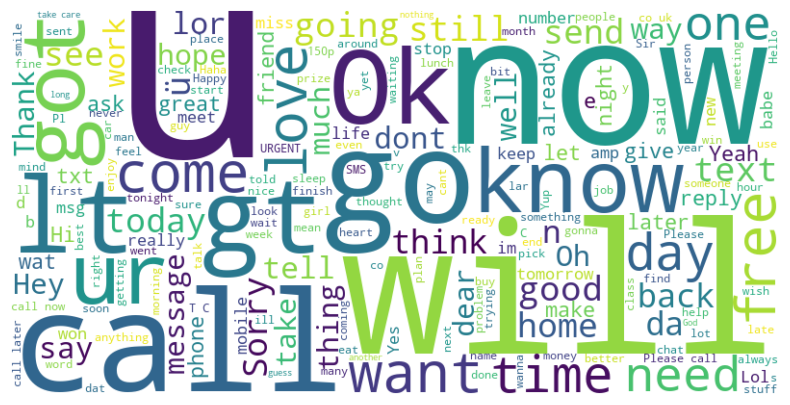

In [70]:
from wordcloud import WordCloud

# Generate word cloud for 'Message' column
text = ' '.join(dt['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [72]:
# Use label encoding to convert 'spam' to 0 and 'ham' to 1

df.loc[df['Category']=='spam','Category',]=0
df.loc[df['Category']=='ham','Category',]=1

In [73]:
print(df)

     Category                                            Message
0           1  Go until jurong point, crazy.. Available only ...
1           1                      Ok lar... Joking wif u oni...
2           0  Free entry in 2 a wkly comp to win FA Cup fina...
3           1  U dun say so early hor... U c already then say...
4           1  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567        0  This is the 2nd time we have tried 2 contact u...
5568        1               Will ü b going to esplanade fr home?
5569        1  Pity, * was in mood for that. So...any other s...
5570        1  The guy did some bitching but I acted like i'd...
5571        1                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [74]:
X=df["Message"]
Y=df["Category"]

In [75]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [76]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [79]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [80]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [85]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [88]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [90]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [112]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
# Création du modèle Logistic Regression

model=LogisticRegression()


In [113]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [114]:
# Prédictions sur les données de test
prediction_on_training_data=model.predict(X_train_features)
acc_on_training_data=accuracy_score(Y_train,prediction_on_training_data)                                         

In [115]:
print("Acc on training data:",acc_on_training_data)
print("Precision on training data:", precision_score(Y_train,prediction_on_training_data))
print("Confusion Matrix on training data:\n", confusion_matrix(Y_train,prediction_on_training_data))

Acc on training data: 0.9676912721561588
Precision on training data: 0.9650087478130467
Confusion Matrix on training data:
 [[ 452  140]
 [   4 3861]]


In [116]:
prediction_on_test_data=model.predict(X_test_features)
acc_on_test_data=accuracy_score(Y_test,prediction_on_test_data)   

In [117]:
print("Acc on test data:",acc_on_test_data)
print("Precision on test data:", precision_score(Y_test,prediction_on_test_data))
print("Confusion Matrix on test data:\n", confusion_matrix(Y_test,prediction_on_test_data))

Acc on test data: 0.9668161434977578
Precision on test data: 0.9628886659979939
Confusion Matrix on test data:
 [[118  37]
 [  0 960]]


In [118]:
input_your_mail=["Congratulations! You have been selected as the lucky winner of our monthly prize draw. To claim your prize of $1000 cash, simply click on the link below and provide your personal information"]
input_data_features=feature_extraction.transform(input_your_mail)
prediction=model.predict(input_data_features)
print(prediction)
if(prediction[0]==1):
  print('ham mail')
else:
  print('Spam mail')

[0]
Spam mail


In [119]:
# Afficher les coefficients (poids) associés à chaque caractéristique
print("Coefficients:", model.coef_)

# Afficher l'intercept (le terme de biais)
print("Intercept:", model.intercept_)

Coefficients: [[-0.69887844 -1.3540533   0.01797883 ...  0.01194058 -0.13745948
   0.01862544]]
Intercept: [2.42919151]


In [120]:
from sklearn.tree import DecisionTreeClassifier

# Création du modèle Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_features,Y_train)

DecisionTreeClassifier()

In [122]:
# Prédictions sur les données de test
y_pred = dt_model.predict(X_train_features)

In [124]:
accTr=accuracy_score(Y_train,y_pred)
print("Acc on training data:",accTr)
print("Precision on training data:", precision_score(Y_train,y_pred))
print("Confusion Matrix on training data:\n", confusion_matrix(Y_train,y_pred))

Acc on training data: 1.0
Precision on training data: 1.0
Confusion Matrix on training data:
 [[ 592    0]
 [   0 3865]]


In [125]:
y_test=model.predict(X_test_features)
accTs=accuracy_score(Y_test,y_test)   
print("Acc on test data:",accTs)
print("Precision on test data:", precision_score(Y_test,y_test))
print("Confusion Matrix on test data:\n", confusion_matrix(Y_test,y_test))

Acc on test data: 0.9668161434977578
Precision on test data: 0.9628886659979939
Confusion Matrix on test data:
 [[118  37]
 [  0 960]]


In [127]:
nouveau_mail = [["Cliquez ici pour obtenir un million de dollars !", "spam"]]
prediction=dt_model.predict(input_data_features)
print(prediction)
if(prediction[0]==1):
  print('ham mail')
else:
  print('Spam mail')

[0]
Spam mail
